In [79]:
import cv2
import os
import numpy as np
from tqdm import tqdm
from sklearn import svm
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc, log_loss
import matplotlib.pyplot as plt

In [80]:
def get_and_process_data(path, image_size):
    data_array = os.listdir(path)
    data = list()
    for img in data_array:
        try:
            img_arr = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
            resized_array = cv2.resize(img_arr, (image_size, image_size))
            #squasing the array in 2D
            reshaped_array = resized_array.reshape(image_size * image_size)
            data.append(reshaped_array)
        except Exception as e:
            # print(e)
            1+1
    return np.array(data)

def analyzeConfusionMatrix(model, cm):
    falsePositiveRatio = cm[0][1]/sum(cm[0])*100
    print(model, 'falsely detected ', "{:.2f}".format(falsePositiveRatio), '% of sane patients as having pneumonia')
    deadRatio = cm[1][0]/sum(cm[1])*100
    print(model,' killed ',"{:.2f}".format(deadRatio), '% of the ill patients')
    print()
    return deadRatio

def runSize(size, algo, algoName):
    dataset_location = './dataset'
    image_size = size
    train_pneumonia = get_and_process_data(dataset_location+'/train/PNEUMONIA', image_size)
    train_normal = get_and_process_data(dataset_location+'/train/NORMAL', image_size)
    test_pneumonia = get_and_process_data(dataset_location+'/test/PNEUMONIA', image_size)
    test_normal = get_and_process_data(dataset_location+'/test/NORMAL', image_size)

    train_x, train_y, test_x, test_y = list(), list(), list(), list()
    for img in tqdm(train_pneumonia):
        train_x.append(img)
        train_y.append('PNEUMONIA')
    for img in tqdm(train_normal):
        train_x.append(img)
        train_y.append('NORMAL')
    for img in tqdm(test_pneumonia):
        test_x.append(img)
        test_y.append('PNEUMONIA')
    for img in tqdm(test_normal):
        test_x.append(img)
        test_y.append('NORMAL')

    _test_y = test_y
    
    model = algo.fit(train_x, train_y)

    y_pred = model.predict(test_x)

    score = model.score(test_x, test_y)
    print(algoName+' score: %f' % score)

    cm = confusion_matrix(test_y, y_pred)

    print(cm)

    analyzeConfusionMatrix(algoName, cm)
    return [{
        "size": size,
        "preds": y_pred,
        "accuracy": score,
        "cm": cm,
    },
    test_y]

In [81]:
gnb = GaussianNB()

In [82]:
arrSize = [2,50,100,150,250,300, 400, 500]
# arrSize = [2,50]
results = []
test_y = list()
for i in arrSize:
    r, test_y = runSize(i, gnb, "Gaussian Naive Bayes")
    results.append(r)


100%|██████████| 234/234 [00:00<00:00, 731891.97it/s]


Gaussian Naive Bayes score: 0.663462
[[ 61 173]
 [ 37 353]]
Gaussian Naive Bayes falsely detected  73.93 % of sane patients as having pneumonia
Gaussian Naive Bayes  killed  9.49 % of the ill patients



100%|██████████| 234/234 [00:00<00:00, 1046340.23it/s]


Gaussian Naive Bayes score: 0.729167
[[149  85]
 [ 84 306]]
Gaussian Naive Bayes falsely detected  36.32 % of sane patients as having pneumonia
Gaussian Naive Bayes  killed  21.54 % of the ill patients



100%|██████████| 234/234 [00:00<00:00, 930300.60it/s]


Gaussian Naive Bayes score: 0.727564
[[145  89]
 [ 81 309]]
Gaussian Naive Bayes falsely detected  38.03 % of sane patients as having pneumonia
Gaussian Naive Bayes  killed  20.77 % of the ill patients



100%|██████████| 234/234 [00:00<00:00, 774638.62it/s]


Gaussian Naive Bayes score: 0.729167
[[147  87]
 [ 82 308]]
Gaussian Naive Bayes falsely detected  37.18 % of sane patients as having pneumonia
Gaussian Naive Bayes  killed  21.03 % of the ill patients



100%|██████████| 234/234 [00:00<00:00, 458415.29it/s]


Gaussian Naive Bayes score: 0.725962
[[145  89]
 [ 82 308]]
Gaussian Naive Bayes falsely detected  38.03 % of sane patients as having pneumonia
Gaussian Naive Bayes  killed  21.03 % of the ill patients



100%|██████████| 234/234 [00:00<00:00, 1550501.00it/s]


Gaussian Naive Bayes score: 0.727564
[[145  89]
 [ 81 309]]
Gaussian Naive Bayes falsely detected  38.03 % of sane patients as having pneumonia
Gaussian Naive Bayes  killed  20.77 % of the ill patients



100%|██████████| 234/234 [00:00<00:00, 611125.24it/s]


Gaussian Naive Bayes score: 0.729167
[[147  87]
 [ 82 308]]
Gaussian Naive Bayes falsely detected  37.18 % of sane patients as having pneumonia
Gaussian Naive Bayes  killed  21.03 % of the ill patients



100%|██████████| 234/234 [00:00<00:00, 748069.46it/s]


Gaussian Naive Bayes score: 0.729167
[[146  88]
 [ 81 309]]
Gaussian Naive Bayes falsely detected  37.61 % of sane patients as having pneumonia
Gaussian Naive Bayes  killed  20.77 % of the ill patients



In [83]:
accuracy = {}
cms = {}
preds = {}
for i in results:
    accuracy[i['size']]=i['accuracy']
    cms[i['size']]=i['cm']
    preds[i['size']]=i['preds']

In [84]:
def accuracyGraph(accDict):

    imgSize=list(accDict.keys())
    print(accDict)
    acc=[x*100 for x in accDict.values()]

    xAxis=np.arange(len(imgSize))
    plt.figure(figsize=(10,5))

    plt.bar(xAxis, acc, width=0.4, label="Accuracy")
    plt.xticks(xAxis, imgSize)
    plt.legend()


    plt.show()

def cmGraph(cmDict):
    imgSize=list(cmDict.keys())
    fp=[x[0][1]/sum(x[0])*100 for x in cmDict.values()]
    fn=[x[1][0]/sum(x[1])*100 for x in cmDict.values()]

    xAxis=np.arange(len(imgSize))
    plt.figure(figsize=(10,5))

    plt.bar(xAxis -0.2, fp, width=0.4, label="False Positive")
    plt.bar(xAxis +0.2, fn, width=0.4, label="False Negative")
    plt.xticks(xAxis, imgSize)
    plt.legend()


    plt.show()

def rocAucGraph():
    i=0
    plt.title('Receiver Operating Characteristic')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    for x in preds:
        print(len(test_y))
        print(preds[x][0][0])
        fpr, tpr, treshold = roc_curve(test_y, preds[x], pos_label=1)

        roc_auc = auc(fpr, tpr)

        plt.plot(fpr, tpr, label = x+' AUC = %0.2f' % roc_auc, color='C'+str(i))
        i = i+1
        plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.show()

{2: 0.6634615384615384, 50: 0.7291666666666666, 100: 0.7275641025641025, 150: 0.7291666666666666, 250: 0.7259615384615384, 300: 0.7275641025641025, 400: 0.7291666666666666, 500: 0.7291666666666666}


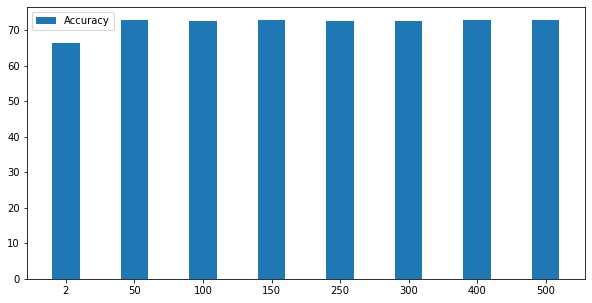

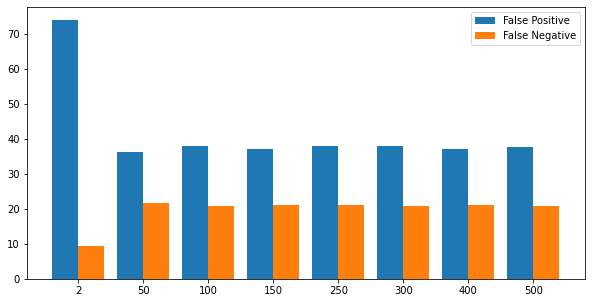

In [85]:
accuracyGraph(accuracy)
cmGraph(cms)


In [86]:
# rocAucGraph()